<a href="https://colab.research.google.com/github/DhruvRajSingh-Coder/LetsUpgrade-AI-ML/blob/master/Day_24_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

___Q1. Build Decision Tree(DV-"Survived",IDV-"Age,Gender and Fare") and Prediction.___

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/train.csv"
Train_Data=pd.read_csv(path)
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Train_Data=Train_Data.drop(columns=['PassengerId','Ticket','Cabin','Embarked'])
Train_Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [ ]:
Train_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
new_age=np.where(Train_Data['Age'].isnull(),29,Train_Data['Age'])
Train_Data['Age']=new_age

In [ ]:
Train_Data.isnull().sum().sum()

0

In [ ]:
label_encoder=preprocessing.LabelEncoder()
Train_Data.Sex=label_encoder.fit_transform(Train_Data.Sex)
Train_Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


In [ ]:
tree_model=tree.DecisionTreeClassifier()
predictors=pd.DataFrame([Train_Data["Sex"],Train_Data["Age"],Train_Data["Fare"]]).T
tree_model=tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=12)
tree_model.fit(X=predictors,y=Train_Data["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
with open("Dtree1.dot",'w') as f:
  f=tree.export_graphviz(tree_model,feature_names=["Sex","Age","Fare"],out_file=f);

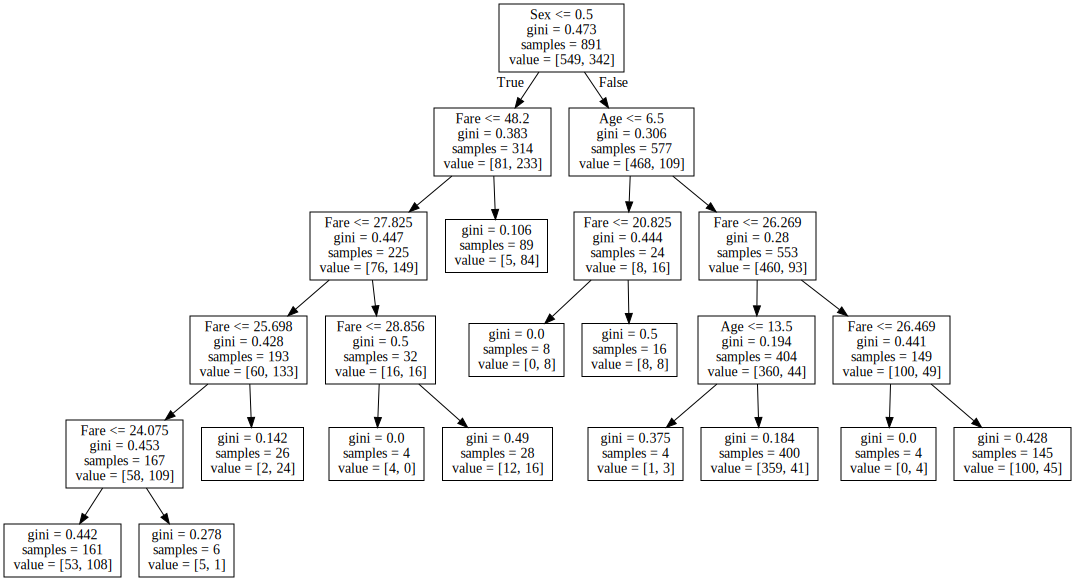

In [ ]:
import graphviz
with open("Dtree1.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [ ]:
tree_model.score(X=predictors,y=Train_Data['Survived'])

0.8114478114478114

In [ ]:
path="/content/drive/My Drive/test.csv"
Test_Data=pd.read_csv(path)
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
Test_Data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
Test_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
new_age1=np.where(Test_Data['Age'].isnull(),29,Test_Data['Age'])
Test_Data['Age']=new_age1
new_fare=np.where(Test_Data['Fare'].isnull(),35,Test_Data['Fare'])
Test_Data['Fare']=new_fare

In [ ]:
Test_Data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
Test_Data.Sex=label_encoder.fit_transform(Test_Data.Sex)
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_features=pd.DataFrame([Test_Data['Sex'],Test_Data['Age'],Test_Data['Fare']]).T
test_preds=tree_model.predict(X=test_features)
Predicted_Output=pd.DataFrame({'PassengerId':Test_Data['PassengerId'],'Survived':test_preds})
Predicted_Output.to_csv("Output.csv",index=False);

In [ ]:
path='/content/Output.csv'
Predicted_Output=pd.read_csv(path)
Predicted_Output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


___Q2. Build Decision Tree for Attrition Rate Analysis (DV - "Attrition",
IDV - Output of RF Algorithm).___

In [ ]:
Data=pd.read_csv("https://raw.githubusercontent.com/LetsUpgrade/AI-ML-July-2020/master/Day-7/Assignment/general_data.csv")
Data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
Data=Data.drop(columns=['EmployeeID','EmployeeCount','Over18','StandardHours'])
Data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
Data.Attrition=label_encoder.fit_transform(Data.Attrition)
Data.BusinessTravel=label_encoder.fit_transform(Data.BusinessTravel)
Data.Department=label_encoder.fit_transform(Data.Department)
Data.EducationField=label_encoder.fit_transform(Data.EducationField)
Data.Gender=label_encoder.fit_transform(Data.Gender)
Data.JobRole=label_encoder.fit_transform(Data.JobRole)
Data.MaritalStatus=label_encoder.fit_transform(Data.MaritalStatus)
Data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [ ]:
Data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.0,0.0,0.0,1.0
BusinessTravel,4410.0,1.607483,0.665304,0.0,1.0,2.0,2.0,2.0
Department,4410.0,1.260544,0.527673,0.0,1.0,1.0,2.0,2.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
EducationField,4410.0,2.247619,1.331067,0.0,1.0,2.0,3.0,5.0
Gender,4410.0,0.600000,0.489954,0.0,0.0,1.0,1.0,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0
JobRole,4410.0,4.458503,2.461263,0.0,2.0,5.0,7.0,8.0


In [ ]:
new_NCW=np.where(Data['NumCompaniesWorked'].isnull(),2,Data['NumCompaniesWorked'])
Data['NumCompaniesWorked']=new_NCW
new_TWY=np.where(Data['TotalWorkingYears'].isnull(),11,Data['TotalWorkingYears'])
Data['TotalWorkingYears']=new_TWY

In [ ]:
Data.isnull().sum().sum()

0

In [ ]:
Data.duplicated().sum()

2914

In [ ]:
Data=Data.drop_duplicates()
Data.duplicated().sum()

0

In [ ]:
Rf_Model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
features=['Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']
Rf_Model.fit(X=Data[features],y=Data.Attrition)
print("OOB Accuracy:")
print(Rf_Model.oob_score_);

OOB Accuracy:
0.8516042780748663


In [ ]:
for feature,imp in zip(features,Rf_Model.feature_importances_):
    print(feature,imp);

Age 0.09736374845498486
BusinessTravel 0.027769307811661717
Department 0.027090212300992175
DistanceFromHome 0.07012497126995854
Education 0.040015172505684767
EducationField 0.04200727834663016
Gender 0.018889838538895278
JobLevel 0.03773428049570135
JobRole 0.05549189881780818
MaritalStatus 0.04060589647317894
MonthlyIncome 0.09219831887054264
NumCompaniesWorked 0.055905956155790956
PercentSalaryHike 0.06385965152801784
StockOptionLevel 0.03356794194200538
TotalWorkingYears 0.08479833676171025
TrainingTimesLastYear 0.04477004704873708
YearsAtCompany 0.06906189172021908
YearsSinceLastPromotion 0.04344970993117481
YearsWithCurrManager 0.05529554102630605


In [ ]:
tree1_model=tree.DecisionTreeClassifier()
predictors1=pd.DataFrame([Data["Age"],Data["MonthlyIncome"],Data["TotalWorkingYears"]]).T
tree1_model=tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=12)
tree1_model.fit(X=predictors1,y=Data["Attrition"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
 with open("Dtree2.dot",'w') as f:
  f=tree.export_graphviz(tree1_model,feature_names=["Age","MonthlyIncome","TotalWorkingYears"],out_file=f);

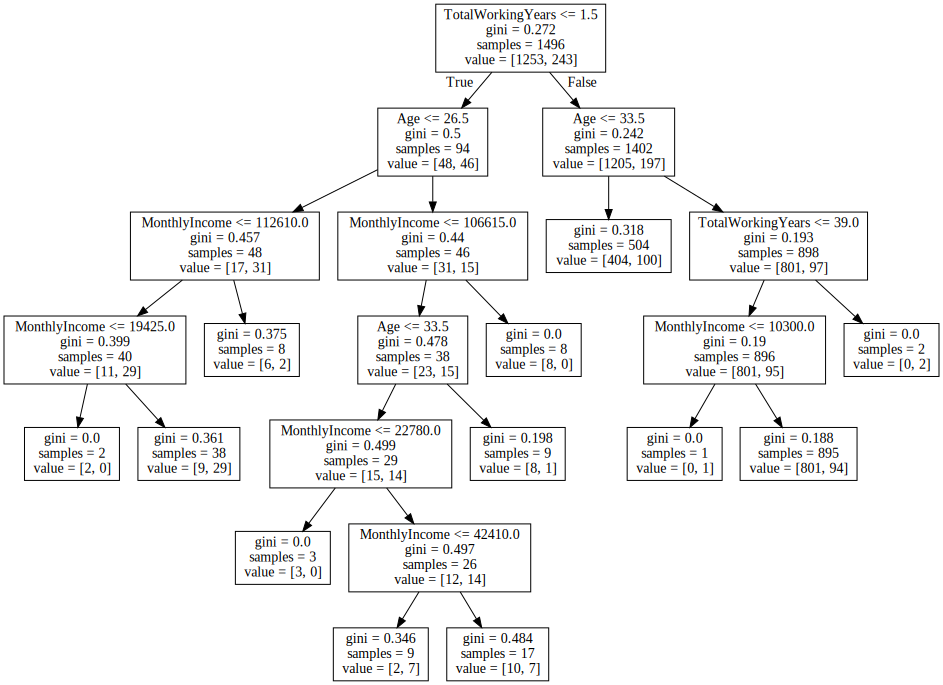

In [ ]:
 with open("Dtree2.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

__☆ Rules:__   
¤ Low chances of Attrition:  
__1.__ If Total Working Years is <= 1.5, Age is <= 26.5 and Monthly Income is <= 19425.  
__2.__ If Total Working Years is <= 1.5, Age is between 26.5 and 33.5 and Monthly Income is <=22780.  
__3.__ If Total Working Years is <= 1.5, Age > 26.5 and Monthly Income > 106615.  
__4.__ If Total Working Years is <= 1.5, Age is > 33.5 and Monthly Income is <= 106615.  
__5.__ If Total Working Years is between 1.5 and 39, Age is > 33.5 and Monthly Income is > 10300.
 
¤ High chances of Attrition:  
__1.__ If Total Working Years is between 1.5 and 39, Age is > 33.5 and Monthly Income is <=10300.  
__2.__ If Total Working Years is > 39 and Age is > 33.5.

___Q3. Build Decision Tree for Bank Loan Modelling (DV - "Personal Loan",
IDV - Output of RF Algorithm).___

In [ ]:
path="/content/drive/My Drive/Colab Notebooks/Bank_Personal_Loan_Modelling.xlsx"
Data1=pd.read_excel(path, sheet_name=1)
Data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
Data1=Data1.drop(columns=['ID','ZIP Code'])
Data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
Data1.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
Data1.duplicated().sum()

13

In [ ]:
Data1=Data1.drop_duplicates()
Data1.duplicated().sum()

0

In [ ]:
Data1['CCAvg']=np.round(Data1['CCAvg'])
Data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,2.0,1,0,0,1,0,0,0
1,45,19,34,3,2.0,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,3.0,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
Data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4987.0,45.347704,11.460838,23.0,35.0,45.0,55.0,67.0
Experience,4987.0,20.114498,11.464902,-3.0,10.0,20.0,30.0,43.0
Income,4987.0,73.824544,46.062728,8.0,39.0,64.0,98.0,224.0
Family,4987.0,2.396631,1.147510,1.0,1.0,2.0,3.0,4.0
CCAvg,4987.0,1.919591,1.797888,0.0,1.0,2.0,3.0,10.0
Education,4987.0,1.879286,0.839667,1.0,1.0,2.0,3.0,3.0
Mortgage,4987.0,56.646080,101.805341,0.0,0.0,0.0,101.0,635.0
Personal Loan,4987.0,0.096250,0.294964,0.0,0.0,0.0,0.0,1.0
Securities Account,4987.0,0.104672,0.306161,0.0,0.0,0.0,0.0,1.0
CD Account,4987.0,0.060557,0.238541,0.0,0.0,0.0,0.0,1.0


In [ ]:
Data1.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
Rf1_Model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
Features=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']
Rf1_Model.fit(X=Data1[Features],y=Data1['Personal Loan'])
print("OOB Accuracy:")
print(Rf1_Model.oob_score_);

OOB Accuracy:
0.9857629837577702


In [ ]:
 for feature,imp in zip(Features,Rf1_Model.feature_importances_):
    print(feature,imp);

Age 0.050502565775224925
Experience 0.050690428166122285
Income 0.36553110549240275
Family 0.09893924200019627
CCAvg 0.13859817111901354
Education 0.1644434774940988
Mortgage 0.04856890247828632
Securities Account 0.006356820542940757
CD Account 0.05533025326708758
Online 0.009683388684889169
CreditCard 0.011355644979737472


In [ ]:
tree2_model=tree.DecisionTreeClassifier()
predictors2=pd.DataFrame([Data1["Income"],Data1["CCAvg"],Data1["Education"]]).T
tree2_model=tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=12)
tree2_model.fit(X=predictors2,y=Data1["Personal Loan"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
 with open("Dtree3.dot",'w') as f:
  f=tree.export_graphviz(tree2_model,feature_names=["Income","CCAvg","Education"],out_file=f);

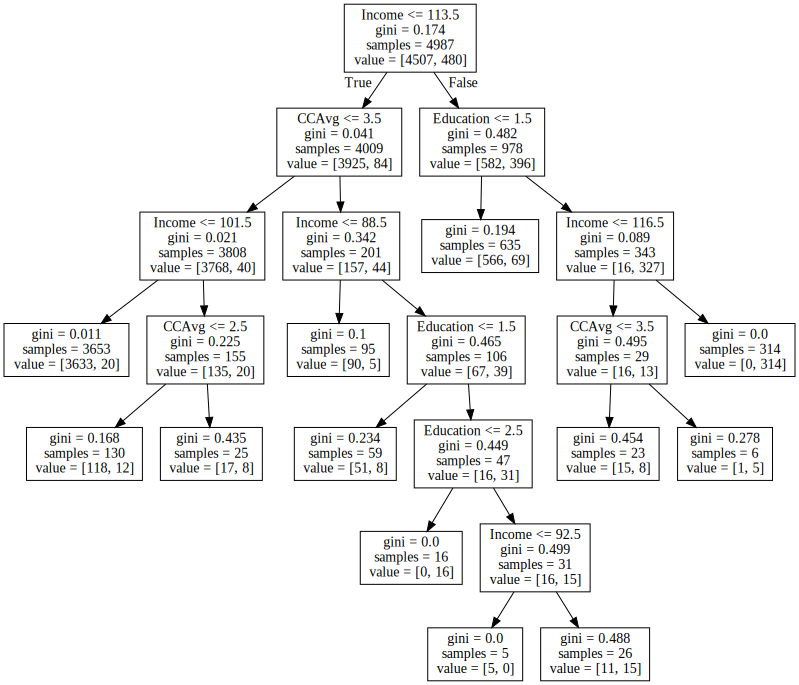

In [ ]:
 with open("Dtree3.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

__☆ Rules :__  
¤ Low chances of getting Personal Loan:  
__1.__ If CC Average is <= 3.5 and Income is <= 101.5.  
__2.__ If CC Average is > 3.5 and Income <= 88.5.  
__3.__ If Education is > 2.5, Income <= 92.5 and CC Average is > 3.5.  
__4.__ If Income > 113.5 and Education <= 1.5.
 
¤ High chances of getting Personal Loan:  
__1.__ If Income is > 88.5, CC Average is > 3.5 and Education is between 1.5 and 2.5.  
__2.__ If Income is > 116.5 and Education is > 1.5.